In [1]:
from pathlib import Path
import numpy as np
import pandas as pd

from get_core_properties_v3 import read_system, get_system_flags

import sys
sys.path.append('..')
from src.util import MESA_DATA_ROOT


/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <

In [2]:
def get_model_dict(grid_folder):
    """Given a model folder, loads the paths of specific stars into a 
    m1, p_orb dictionary."""
    d = dict()
    for model_folder in grid_folder.glob('m*_w*'):
        if model_folder.suffix == '.log':
            continue
        try:
            m, p, w = model_folder.name.replace('d', 'e').split('_')
            w = float(w.lstrip('w'))
            p = f'{float(p.lstrip("p")):.2f}'      
        except ValueError:
            m, w = model_folder.name.replace('d', 'e').split('_')   
            w = float(w.lstrip('w'))
            p = (2*np.pi/w) / (60*60*24)
        m = f'{float(m.lstrip("m")):.1f}'
        
        if m not in d.keys():
            d[m] = dict()
        d[m][p] = model_folder
    return d

def load_models(project_folder):
    model_folders = list(project_folder.glob('*_md*_m*_zsundiv*_*y0_*dy'))
    _model_dicts = np.array([get_model_dict(folder) for folder in model_folders])
    model_dicts = dict()
    for dicts in _model_dicts:
        for m in dicts.keys():
            if m not in model_dicts.keys():
                model_dicts[m] = dicts[m]
    return model_dicts

In [3]:
project_folder = MESA_DATA_ROOT/'sse_enhanced_w_proof_of_concept/00_ZdivZsun_1d-1'
model_dicts_01zsun = load_models(project_folder)

project_folder = MESA_DATA_ROOT/'sse_enhanced_w_proof_of_concept/09_ZdivZsun_5d-4'
model_dicts_00005zsun = load_models(project_folder)

project_folder = MESA_DATA_ROOT/'sse_enhanced_w_proof_of_concept/08_ZdivZsun_5d-3'
model_dicts_0005zsun = load_models(project_folder)

project_folder = MESA_DATA_ROOT/'sse_enhanced_w_proof_of_concept/07_ZdivZsun_2d-2'
model_dicts_002zsun = load_models(project_folder)

project_folder = MESA_DATA_ROOT/'sse_enhanced_w_proof_of_concept/05_ZdivZsun_1d0'
model_dicts_10zsun = load_models(project_folder)

project_folder = MESA_DATA_ROOT/'sse_enhanced_w_proof_of_concept/04_ZdivZsun_8d-1'
model_dicts_08zsun = load_models(project_folder)

project_folder = MESA_DATA_ROOT/'sse_enhanced_w_proof_of_concept/03_ZdivZsun_6d-1'
model_dicts_06zsun = load_models(project_folder)


In [4]:
model_path = model_dicts_10zsun['100.0']['3.00']
row = read_system(model_path, '0.005')

In [5]:
import mesa_reader as mr
h = mr.MesaData(str(model_path/'LOGS/history.data'))

In [6]:
h.center_h1

array([0.69948451, 0.69950606, 0.69958194, 0.69960224, 0.69960411,
       0.69960425, 0.69960423, 0.69960413, 0.69960392, 0.69960365,
       0.69960334, 0.699603  , 0.69960263, 0.69960222, 0.69960176,
       0.69960126, 0.6996007 , 0.69960008, 0.6995994 , 0.69959864,
       0.6995978 , 0.69959688, 0.69959586, 0.69959474, 0.6995935 ,
       0.69959214, 0.69959064, 0.69958898, 0.69958717, 0.69958518,
       0.699583  , 0.69958062, 0.69957802, 0.69957518, 0.69957208,
       0.6995687 , 0.69956502, 0.69956101, 0.69955663, 0.69955184,
       0.6995466 , 0.69954083, 0.69953447, 0.6995274 , 0.69951954,
       0.69951074, 0.69950082, 0.69948963, 0.69947696, 0.69946265,
       0.69944646, 0.69942818, 0.6994077 , 0.69938479, 0.69935911,
       0.69933072, 0.69929915, 0.69926426, 0.69922583, 0.69918334,
       0.69913658, 0.6990852 , 0.69902849, 0.69896613, 0.69889758,
       0.69882262, 0.69874004, 0.6986493 , 0.69854915, 0.69843942,
       0.69831892, 0.69818659, 0.69804127, 0.69788167, 0.69770

In [12]:
h.center_he4

array([0.28417922, 0.284179  , 0.28418009, 0.28418124, 0.28418247,
       0.28418376, 0.28418514, 0.28418658, 0.28418812, 0.28418976,
       0.2841915 , 0.28419337, 0.28419538, 0.28419757, 0.28419996,
       0.28420259, 0.28420552, 0.2842088 , 0.28421252, 0.28421675,
       0.28422163, 0.28422729, 0.28423388, 0.2842416 , 0.28425063,
       0.28426118, 0.28427345, 0.28428762, 0.28430387, 0.2843221 ,
       0.28434248, 0.28436479, 0.28438889, 0.28441507, 0.28444311,
       0.28447349, 0.2845068 , 0.28454363, 0.28458465, 0.28463144,
       0.28468279, 0.28473999, 0.28480369, 0.28487354, 0.28495019,
       0.28503581, 0.28512905, 0.28523222, 0.28534637, 0.28547149,
       0.28560877, 0.28576019, 0.28592675, 0.28610932, 0.28630979,
       0.28653038, 0.28677243, 0.28703766, 0.28732876, 0.28764854,
       0.28799893, 0.28838253, 0.28880346, 0.28926536, 0.28977437,
       0.29032639, 0.29093445, 0.29160128, 0.29232756, 0.29312438,
       0.29399964, 0.29495945, 0.29600375, 0.29714963, 0.29821

In [6]:
get_system_flags(model_path)

([True, False, True, True, True, False, False, True],
 <mesa_reader.MesaData at 0x1555020dc2b0>)

In [9]:
h.center_he4[-1]

0.00028451911771548103

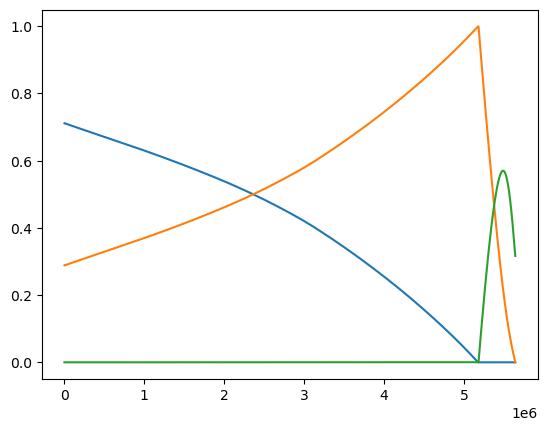

In [10]:
import matplotlib.pyplot as plt
plt.plot(h.star_age, h.center_h1)
plt.plot(h.star_age, 
         h.center_he4)
plt.plot(h.star_age, h.center_c12)

In [10]:
list((model_path/'LOGS').glob('*.data'))

[PosixPath('/mnt/ceph/users/ldesa/mesa_che_grids/sse_enhanced_w_proof_of_concept/05_ZdivZsun_1d0/008_md1_m100_zsundiv10_04y0_03dy/m1.000d+02_p3.000d+00_w2.424d-05/LOGS/CHE_single_core_collapse.data'),
 PosixPath('/mnt/ceph/users/ldesa/mesa_che_grids/sse_enhanced_w_proof_of_concept/05_ZdivZsun_1d0/008_md1_m100_zsundiv10_04y0_03dy/m1.000d+02_p3.000d+00_w2.424d-05/LOGS/profile4.data'),
 PosixPath('/mnt/ceph/users/ldesa/mesa_che_grids/sse_enhanced_w_proof_of_concept/05_ZdivZsun_1d0/008_md1_m100_zsundiv10_04y0_03dy/m1.000d+02_p3.000d+00_w2.424d-05/LOGS/profile2.data'),
 PosixPath('/mnt/ceph/users/ldesa/mesa_che_grids/sse_enhanced_w_proof_of_concept/05_ZdivZsun_1d0/008_md1_m100_zsundiv10_04y0_03dy/m1.000d+02_p3.000d+00_w2.424d-05/LOGS/history.data'),
 PosixPath('/mnt/ceph/users/ldesa/mesa_che_grids/sse_enhanced_w_proof_of_concept/05_ZdivZsun_1d0/008_md1_m100_zsundiv10_04y0_03dy/m1.000d+02_p3.000d+00_w2.424d-05/LOGS/profile3.data'),
 PosixPath('/mnt/ceph/users/ldesa/mesa_che_grids/sse_enhance

In [14]:
prof = mr.MesaData(str(model_path/'LOGS/profile4.data'))

In [18]:
prof.mass

array([9.70894125e+01, 9.70894125e+01, 9.70894125e+01, ...,
       9.75647425e-06, 9.71291023e-06, 9.63702812e-06])

In [15]:
prof.J_inside

array([3.19359215e+53, 3.19359215e+53, 3.19359215e+53, ...,
       5.14461603e+41, 5.12145697e+41, 5.08123747e+41])

In [ ]:
prof.

In [7]:
prof.mass[0]

33.93736983216337

In [8]:
len(prof.mixing_type) - np.where(prof.mixing_type[::-1] != 1)[0][0]

2111

In [ ]:
row = read_system(model_path, '0.0005')

In [11]:
row.iloc[0]

z_key                                0.1
m_zams                              80.0
m_wr0                          79.526121
m_wr1                          57.117217
m_tams                         44.040247
m_tahems                       33.970154
m_f                             33.93737
m_c_zams                       61.810767
m_c_wr0                        63.771941
m_c_wr1                        45.908341
m_c_tams                       30.648966
m_c_tahems                      16.54786
m_c_f                           0.000003
p_zams                          1.401835
p_wr0                            1.61224
p_wr1                          16.256212
p_tams                          9.563283
p_tahems                        0.839802
p_f                             0.006662
r_zams                         10.808682
r_wr0                          11.482711
r_wr1                          10.279706
r_tams                          3.542763
r_tahems                        1.271589
r_f             

In [ ]:
model_path = model_dicts_01zsun['80.0']['1.40']

: 

: 

: 

: 

: 

: 

: 

In [ ]:
row = read_system(model_path)

25 7 32


: 

: 

: 

: 

: 

: 

: 

In [ ]:
row

,m_zams,m_wr0,m_wr1,m_tams,m_tahems,m_f,p_zams,p_wr0,p_wr1,p_tams,...,rho_c_tahems,rho_c_f,t_d,is_che,is_crit_at_zams,is_merger_at_zams,is_l2of_at_zams,is_half_C_depleted,is_C_depleted,is_crash
0,79.995782,79.526121,57.117217,44.040247,33.970154,0.000003,1.401835,1.61224,16.256212,9.563283,...,5.510846e-09,1.752872e-08,3.946283e+31,True,False,False,False,True,True,False


: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
df = pd.DataFrame([[1,2,3]], columns=['a', 'b', 'c'], dtype={'a': 'int', 'b': 'int', 'c': 'int'})

ValueError: entry not a 2- or 3- tuple

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
df

,a,b,c
0,1,2,3


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 